In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd

import seaborn as sns

In [2]:
df= pd.read_csv("/content/drive/MyDrive/475/livercancer_inc_per100k_pop_2015_2019.csv")
gender = pd.read_csv("/content/drive/MyDrive/475/livercancer_inc_per100k_pop_2015_2019_gender.csv")
race = pd.read_csv("/content/drive/MyDrive/475/livercancer_inc_per100k_pop_2015_2019_race.csv")
diabetes = pd.read_csv("/content/drive/MyDrive/475/diabetes_adults_per100k_pop_2018_2019.csv")
obesity = pd.read_csv("/content/drive/MyDrive/475/obesity_adults_per100k_pop_2018_2019.csv")
alcohol = pd.read_csv("/content/drive/MyDrive/475/binge_drinking_alcohol_adults_per100k_pop_2018_2019.csv")
poverty = pd.read_csv("/content/drive/MyDrive/475/pop_perc_below_poverty_2018_2019.csv")

convert value from string to float

In [3]:
df.drop(df[df['Value'] == "Suppressed"].index, inplace = True)
df['Value'] = df['Value'].astype(float)

In [4]:
gender.drop(gender[gender['Value'] == "Suppressed"].index, inplace = True)
gender['Value'] = gender['Value'].astype(float)

<ipython-input-5-8127863ee98b>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_gender = gender.groupby(['State', 'Gender']).sum().reset_index()


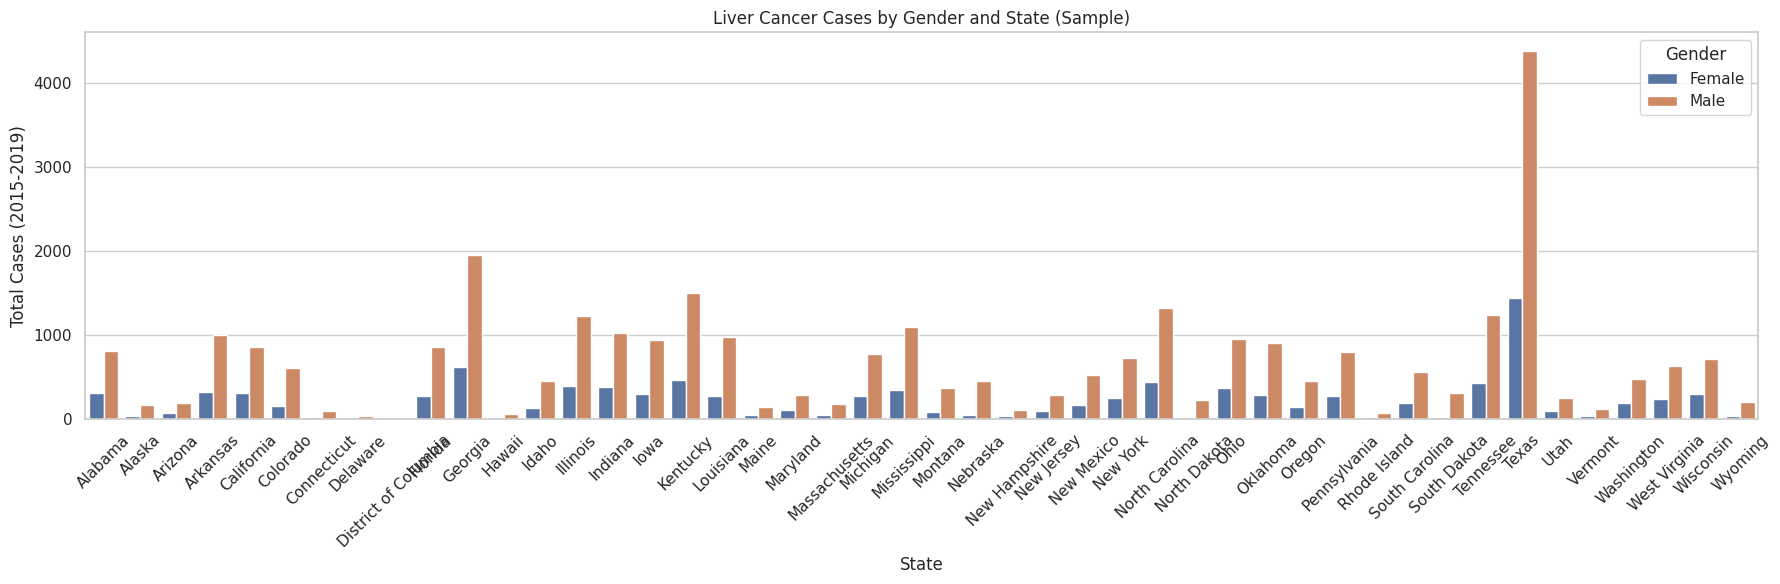

In [5]:

grouped_gender = gender.groupby(['State', 'Gender']).sum().reset_index()

# Pivot the DataFrame to get Gender as columns
pivot_df = grouped_gender.pivot(index='State', columns='Gender', values='Value').reset_index()

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(18, 6))
bar_plot = sns.barplot(x='State', y='Value', hue='Gender', data=grouped_gender)
plt.xticks(rotation=45)
plt.title('Liver Cancer Cases by Gender and State (Sample)')
plt.ylabel('Total Cases (2015-2019)')
plt.xlabel('State')

# Show plot
plt.tight_layout()
plt.show()

Get Male and female average liver cancer per 100k population

In [6]:
male_avg = gender.loc[gender['Gender'] == 'Male', 'Value'].mean()
female_avg = gender.loc[gender['Gender'] == 'Female', 'Value'].mean()
print(male_avg,female_avg)

12.570443645083932 4.670859090909091


Male: 12.57 Female: 4.67

Get average liver cancer per 100k population by Race

In [7]:
race.drop(race[race['Value'] == "Suppressed"].index, inplace = True)
race['Value'] = race['Value'].astype(float)

<ipython-input-8-2dd14f0c074c>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_race = race.groupby(['State', 'Race Ethnicity']).sum().reset_index()


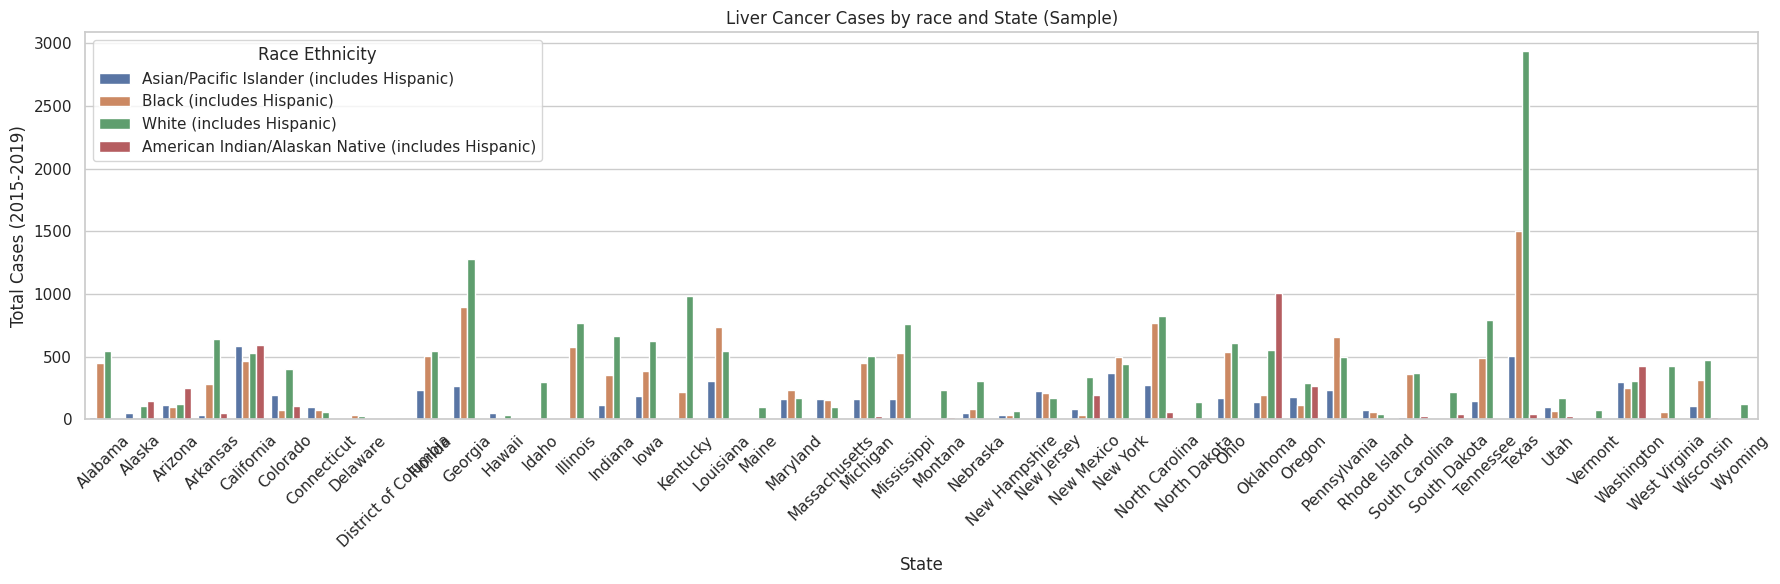

In [8]:
grouped_race = race.groupby(['State', 'Race Ethnicity']).sum().reset_index()


pivot_df = grouped_race.pivot(index='State', columns='Race Ethnicity', values='Value').reset_index()


sns.set(style="whitegrid")
plt.figure(figsize=(18, 6))
bar_plot = sns.barplot(x='State', y='Value', hue='Race Ethnicity', data=grouped_race)
plt.xticks(rotation=45)
plt.title('Liver Cancer Cases by race and State (Sample)')
plt.ylabel('Total Cases (2015-2019)')
plt.xlabel('State')

# Show plot
plt.tight_layout()
plt.show()

In [9]:
blk_avg = race.loc[race['Race Ethnicity'] == 'Black (includes Hispanic)', 'Value'].mean()
ap_avg = race.loc[race['Race Ethnicity'] == 'Asian/Pacific Islander (includes Hispanic)', 'Value'].mean()
wt_avg = race.loc[race['Race Ethnicity'] == 'White (includes Hispanic)', 'Value'].mean()
native_avg = race.loc[race['Race Ethnicity'] == 'American Indian/Alaskan Native (includes Hispanic)', 'Value'].mean()
print(blk_avg, ap_avg, wt_avg, native_avg)

11.084066029539532 13.3393018018018 7.974678500986194 17.096632124352332


Black: 11.08
Asian/Pacific: 13.34
White: 7.97
Native:17.09

In [10]:
def get_state(state_fips):
    match = df.loc[df['StateFIPS'] == state_fips, 'State']
    return match.values[0] if not match.empty else np.nan


In [ ]:
output_df = pd.DataFrame(columns=['State'])
for i in range(1, 56):
    state_name = get_state(i)
    output_df = output_df.append({'StateFIPS': i ,'State': state_name}, ignore_index=True)

In [12]:
averages = []

for i in range(1, 56):
    avg = df.loc[df['StateFIPS'] == i, 'Value'].mean()
    averages.append(avg)

output_df2 = pd.DataFrame(averages, columns=['Average'])

In [13]:
avg_by_state = pd.concat([output_df['State'], output_df2['Average']], axis=1)
avg_by_state = avg_by_state.dropna()

Liver cancer per 100k by state

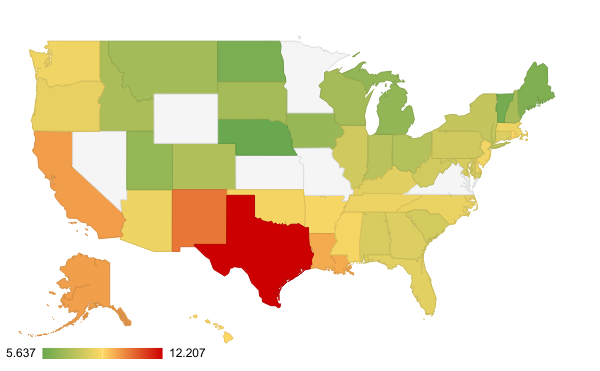

In [14]:
obesity.drop(obesity[obesity['Value'] == "Suppressed"].index, inplace = True)
obesity['Value'] = obesity['Value'].astype(float)

In [15]:
averages_obs = []

for i in range(1, 56):
    avg = obesity.loc[obesity['StateFIPS'] == i, 'Value'].mean()
    averages_obs.append(avg)

obesity_out = pd.DataFrame(averages_obs, columns=['Average'])

In [16]:
avg_obesity_by_state = pd.concat([output_df['State'], obesity_out['Average']], axis=1).dropna()


In [17]:
avg_obesity_by_state.to_csv('/content/drive/MyDrive/475/obesity.csv')

Obesity vs State

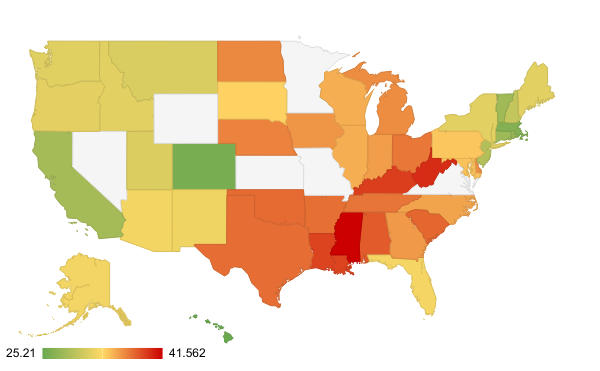

In [ ]:
averages_diabetes = []

for i in range(1, 56):
    avg = diabetes.loc[diabetes['StateFIPS'] == i, 'Value'].mean()
    averages_diabetes.append(avg)

diabetes_out = pd.DataFrame(averages_diabetes, columns=['Average'])

In [ ]:
diabetes_by_state = pd.concat([output_df['State'], diabetes_out['Average']], axis=1).dropna()


In [ ]:
diabetes_by_state.to_csv('/content/drive/MyDrive/475/diabetes.csv')

Diabeties vs State

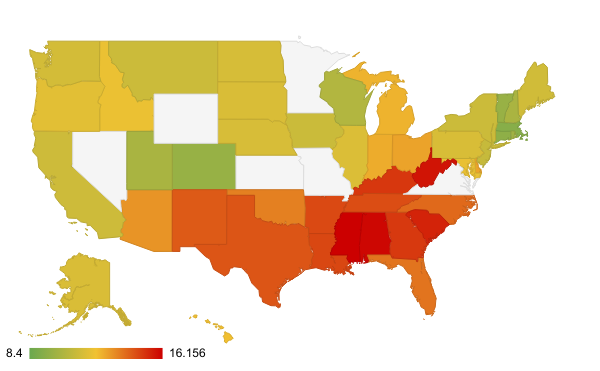

In [ ]:
averages_alcohol = []

for i in range(1, 56):
    avg = alcohol.loc[alcohol['StateFIPS'] == i, 'Value'].mean()
    averages_alcohol.append(avg)

alcohol_out = pd.DataFrame(averages_alcohol, columns=['Average'])

In [ ]:
alcohol_by_state = pd.concat([output_df['State'], alcohol_out['Average']], axis=1).dropna()


In [ ]:
alcohol_by_state.to_csv('/content/drive/MyDrive/475/alcohol.csv')

Alcohol vs state

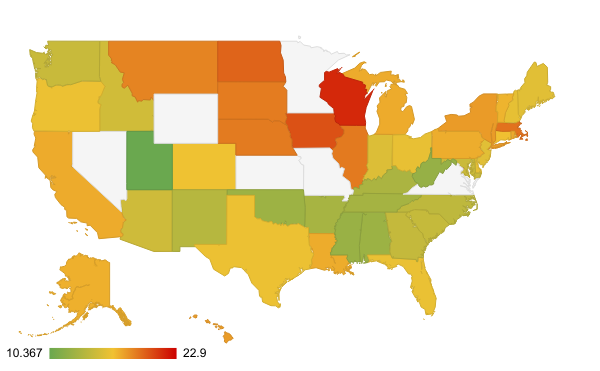

In [44]:
liver_cancer_alc = df.groupby('State')['Value'].mean()

alcohol_consumption_2019 = alcohol[alcohol['Year'] == 2019]
alcohol_consumption_alc = alcohol_consumption_2019.groupby('State')['Value'].mean()
merged_alcohol = pd.merge(liver_cancer_alc, alcohol_consumption_alc, on='State', how='inner')
merged_alcohol.rename(columns={'Value_x': 'LiverCancer', 'Value_y': 'Alcohol'}, inplace=True)

merged_alcohol.head()

,LiverCancer,Alcohol
State,,
Alabama,8.059851,13.037313
Alaska,9.794118,17.313793
Arizona,8.557333,15.120000
Arkansas,8.724000,12.810667
California,9.835345,17.298276


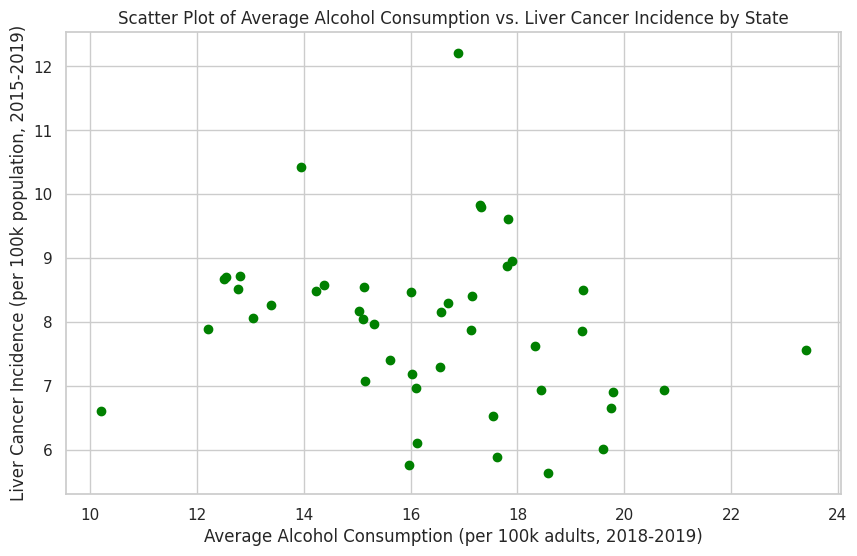

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_alcohol['Alcohol'], merged_alcohol['LiverCancer'], color='green')
plt.xlabel('Average Alcohol Consumption (per 100k adults, 2018-2019)')
plt.ylabel('Liver Cancer Incidence (per 100k population, 2015-2019)')
plt.title('Scatter Plot of Average Alcohol Consumption vs. Liver Cancer Incidence by State')
plt.grid(True)

In [38]:
poverty['Value'] = pd.to_numeric(poverty['Value'], errors='coerce')

In [52]:
liver_cancer_pov = df.groupby('State')['Value'].mean(numeric_only=True).astype(float)
poverty = poverty[poverty['Year'] == 2019]
poverty1 = poverty.groupby('State')['Value'].mean()
merged_poverty = pd.merge(liver_cancer_pov, poverty1, on='State', how='inner')
merged_poverty.rename(columns={'Value_x': 'LiverCancer', 'Value_y': 'Poverty'}, inplace=True)

merged_poverty.head()

,LiverCancer,Poverty
State,,
Alabama,8.059851,18.664179
Alaska,9.794118,12.810345
Arizona,8.557333,17.946667
Arkansas,8.724000,18.860000
California,9.835345,13.020690


In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_poverty['Poverty'], merged_poverty['LiverCancer'], color='red')
plt.xlabel('Poverty Percentage')
plt.ylabel('Liver Cancer Incidence ')
plt.title('Scatter Plot of Poverty Percentage vs. Liver Cancer Incidence by State')

# Display the scatter plot
plt.show()

In [54]:
liver_cancer_diabetes = df.groupby('State')['Value'].mean(numeric_only=True).astype(float)
Diabetes = diabetes[diabetes['Year'] == 2019]
Diabetes1 = Diabetes.groupby('State')['Value'].mean()
merged_Diabetes = pd.merge(liver_cancer_pov, poverty1, on='State', how='inner')
merged_Diabetes.rename(columns={'Value_x': 'LiverCancer', 'Value_y': 'Diabetes'}, inplace=True)

merged_Diabetes.head()

,LiverCancer,Diabetes
State,,
Alabama,8.059851,18.664179
Alaska,9.794118,12.810345
Arizona,8.557333,17.946667
Arkansas,8.724000,18.860000
California,9.835345,13.020690


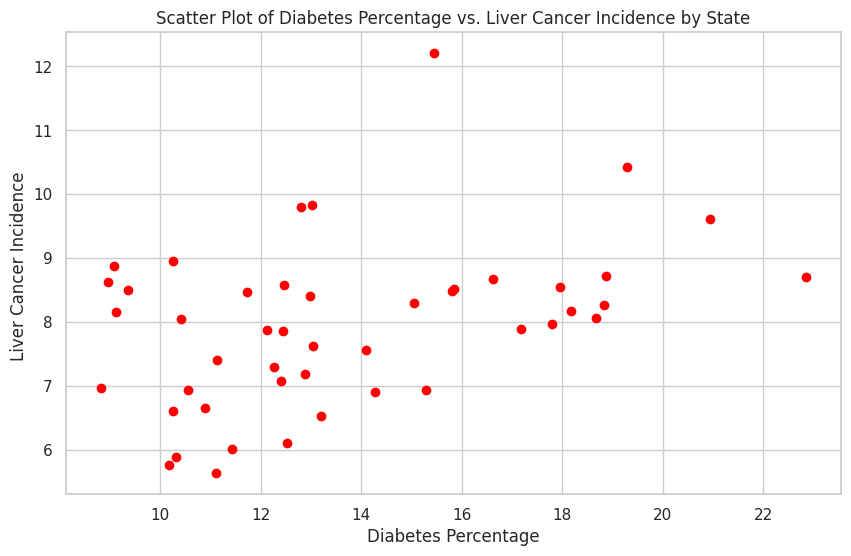

In [55]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_Diabetes['Diabetes'], merged_Diabetes['LiverCancer'], color='red')
plt.xlabel('Diabetes Percentage')
plt.ylabel('Liver Cancer Incidence ')
plt.title('Scatter Plot of Diabetes Percentage vs. Liver Cancer Incidence by State')

# Display the scatter plot
plt.show()

In [ ]:
liver_cancer_Obesity = df.groupby('State')['Value'].mean(numeric_only=True).astype(float)
Obesity = obesity[obesity['Year'] == 2019]
Obesity1 = Obesity.groupby('State')['Value'].mean()
merged_Obesity = pd.merge(liver_cancer_pov, poverty1, on='State', how='inner')
merged_Obesity.rename(columns={'Value_x': 'LiverCancer', 'Value_y': 'Obesity'}, inplace=True)

merged_Obesity.head()

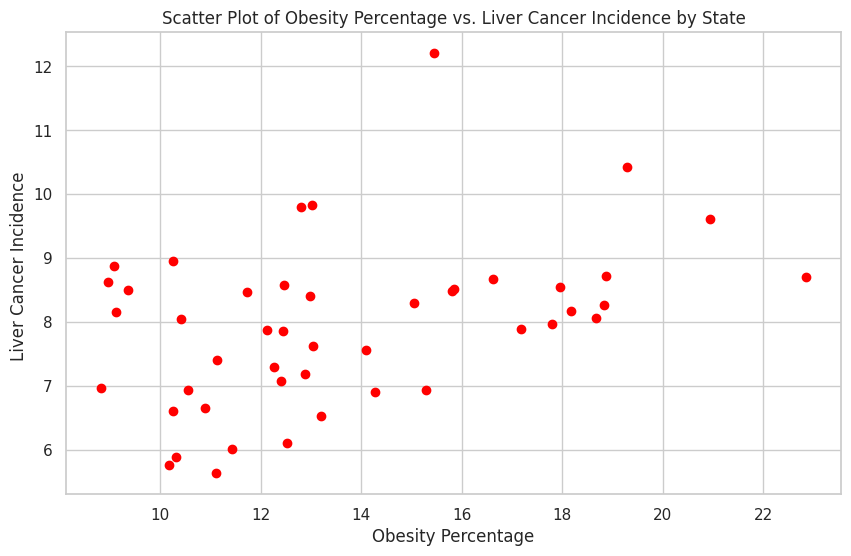

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_Obesity['Obesity'], merged_Obesity['LiverCancer'], color='red')
plt.xlabel('Obesity Percentage')
plt.ylabel('Liver Cancer Incidence ')
plt.title('Scatter Plot of Obesity Percentage vs. Liver Cancer Incidence by State')

# Display the scatter plot
plt.show()